In [2]:
import os, sys

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

In [3]:
# 0. MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [5]:
# 1. 실험용 설정
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
# optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)
    train_loss[key] = []

In [6]:
# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
        
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
        
        if i % 100 == 0:
            print("==========" + "iteration: " + str(i) + "==========")
            for key in optimizers.keys():
                loss = networks[key].loss(x_batch, t_batch)
                print(key + " : " + str(loss))

==========iteration: 0==========
SGD : 2.3231514534634212
Momentum : 2.4021076448821823
AdaGrad : 2.466403571617446
Adam : 2.401309654955471
==========iteration: 0==========
SGD : 2.3231514534634212
Momentum : 2.364018707313055
AdaGrad : 2.466403571617446
Adam : 2.401309654955471
==========iteration: 0==========
SGD : 2.3231514534634212
Momentum : 2.364018707313055
AdaGrad : 2.2806439096804203
Adam : 2.401309654955471
==========iteration: 0==========
SGD : 2.3231514534634212
Momentum : 2.364018707313055
AdaGrad : 2.2806439096804203
Adam : 2.203026291395057
==========iteration: 100==========
SGD : 1.4503410799691985
Momentum : 0.33916148963642834
AdaGrad : 0.22248910915312609
Adam : 0.358481650934077
==========iteration: 100==========
SGD : 1.4503410799691985
Momentum : 0.3022755577573745
AdaGrad : 0.22248910915312609
Adam : 0.358481650934077
==========iteration: 100==========
SGD : 1.4503410799691985
Momentum : 0.3022755577573745
AdaGrad : 0.1319357939159641
Adam : 0.358481650934077
==

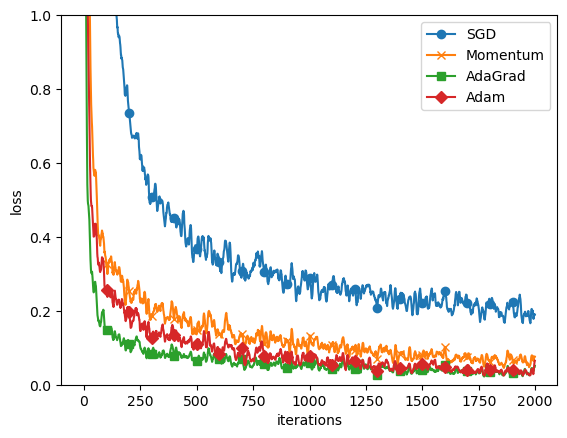

In [7]:
# 3. 그래프 그리기
markers = {"SGD" : "o", "Momentum" : "x", "AdaGrad" : "s", "Adam" : "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)

plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()